In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.821632579103976


In [5]:
y1=clf.predict(X)

In [6]:
X=np.insert(X,13,1,axis=1) #adding intercept term

In [7]:
X.shape

(506, 14)

In [8]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  1.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  1.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  1.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  1.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  1.        ]])

In [9]:
w0=np.random.normal(0,1,13)

In [10]:
w0=np.insert(w0,13,np.random.normal(0,1))

In [11]:
w0.shape


(14,)

In [12]:
def optimize(w0,index):
    x=X[index]# x is single row and it is vector
    return((x.T).dot((np.dot(w0,x.T)-Y[index]))) #(w0.dot(x.T) is yhat which is same as w1x1+w2x2+w3x3..i.e looping over all coef 
                                              #for single datapoint or row x=[x1,x2,x3,x4....])
    
    

In [13]:
def SGD(w0, alpha, num_iters):
    for i in range(0, num_iters + 1):
        for i in range(0,len(X)):#looping over each datapoint
            grad = optimize(w0,i)
            w0 = w0 - (alpha * (grad))*(1/len(Y))
    return w0

In [14]:
W=SGD(w0,0.01,1000)

In [15]:
W

array([-7.65857167e-01,  8.66593497e-01, -2.24495688e-01,  7.46642398e-01,
       -1.78972079e+00,  2.80669927e+00,  1.91472398e-02, -2.84041475e+00,
        1.38833378e+00, -7.76747620e-01, -1.97799048e+00,  8.44931901e-01,
       -3.75131804e+00,  2.25272636e+01])

In [16]:
clf.coef_

array([-0.73363219,  0.63013849, -0.30373658,  0.85005029, -0.98797581,
        3.22109013, -0.01139117, -2.23376573,  1.01451125, -0.57360861,
       -1.7846731 ,  0.8902997 , -3.37578432])

In [17]:
y=(W.T).dot(X.T)

In [18]:
print(mean_squared_error(Y, y))

22.148899707457407


In [19]:
from prettytable import PrettyTable
t = PrettyTable(['weights obtained by custom SGD', 'weights obtained by sklearn SGD'])
for i,j in zip(W,clf.coef_):
    t.add_row([i,j])
print(t)

+--------------------------------+---------------------------------+
| weights obtained by custom SGD | weights obtained by sklearn SGD |
+--------------------------------+---------------------------------+
|      -0.7658571674123569       |       -0.7336321894005576       |
|       0.8665934967700102       |        0.6301384913936893       |
|      -0.22449568793425512      |       -0.3037365849518907       |
|       0.7466423982875933       |        0.8500502898819837       |
|      -1.7897207907516945       |       -0.9879758102978256       |
|       2.8066992737046186       |        3.2210901295521763       |
|      0.01914723982598403       |      -0.011391168119807272      |
|      -2.8404147531906485       |        -2.233765725559765       |
|       1.3883337844316743       |        1.0145112528774014       |
|       -0.776747620270307       |        -0.573608614779953       |
|      -1.9779904843818659       |       -1.7846731047467606       |
|       0.8449319014374259       |

In [20]:
t = PrettyTable(['MSE obtained by custom SGD', 'MSE obtained by sklearn SGD'])
t.add_row([22.148899707457407,22.881242224373757])
print(t)

+----------------------------+-----------------------------+
| MSE obtained by custom SGD | MSE obtained by sklearn SGD |
+----------------------------+-----------------------------+
|     22.148899707457407     |      22.881242224373757     |
+----------------------------+-----------------------------+


In [24]:
x=[]
for i in range(0,506):
    x.append(i)

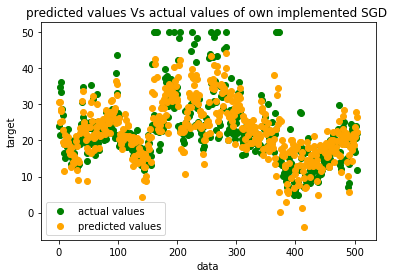

In [25]:
plt.scatter(x, Y,  color= "green", label="actual values")
plt.scatter(x, y,  color= "orange", label="predicted values")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.title("predicted values Vs actual values of own implemented SGD ")
plt.show()

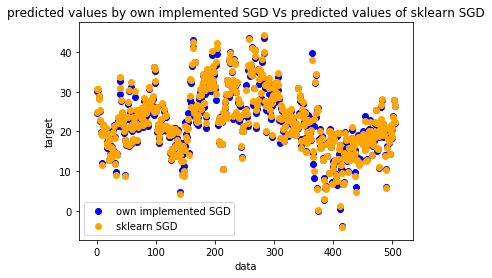

In [27]:
plt.scatter(x, y1,  color= "blue", label="own implemented SGD")
plt.scatter(x, y,  color= "orange", label="sklearn SGD")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.title("predicted values by own implemented SGD Vs predicted values of sklearn SGD")
plt.show()